In [240]:
import numpy as np
from sklearn.utils import shuffle
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support
from IPython.display import Image  
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [222]:
d1=pd.read_csv('/Volumes/Work/study/U Cincinnati/IDA/assignments/Classification of Biochemical Data/Biomechanical_Data_column_2C_weka.csv')
d1 = shuffle(d1)
X = d1.loc[:,'pelvic_incidence':'degree_spondylolisthesis']
y = d1.loc[:,'class']

In [223]:
list(d1.keys())

['pelvic_incidence',
 'pelvic_tilt numeric',
 'lumbar_lordosis_angle',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis',
 'class']

In [224]:
X_train,X_test,y_train,y_test = X[:210] , X[210:], y[:210] , y[210:]

# Data Analysis Using Linear Kernel

In [225]:
svm = SVC(kernel='linear') 
train_svm = svm.fit(X_train, y_train)

In [226]:
pred = train_svm.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True, sample_weight=None)
acc

0.89000000000000001

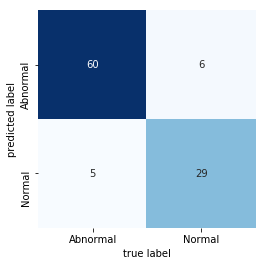

In [257]:
#value = classification_report(y_test,pred)
class_names = ['Abnormal', 'Normal']
confusionMatrix = confusion_matrix(y_test, pred)
sns.heatmap(confusionMatrix.T, square=True, annot=True, fmt='d', cbar=False,
                    xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');
result = precision_recall_fscore_support(y_test, pred, average=None, labels=['Abnormal', 'Normal'])

In [227]:
supportVectors = train_svm.support_vectors_

In [309]:
countSupportVector = train_svm.n_support_
print('Number of support Vectors for class Abnormal: \t' + str(countSupportVector[0]))
print('Number of support Vectors for class Normal:   \t' + str(countSupportVector[1]))

Number of support Vectors for class Abnormal: 	139
Number of support Vectors for class Normal:   	59


In [229]:
supportVectorIndices = train_svm.support_

# Support vectors for class - Abnormal

In [230]:
classAbnormalSupportVector = pd.DataFrame(supportVectors[:countSupportVector[0]], columns=('pelvic_incidence', 'pelvic_tilt numeric',
                             'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'))
classAbnormalSupportVector

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,69.781006,13.777465,58.000000,56.003541,118.930666,17.914560
1,41.352504,16.577364,30.706191,24.775141,113.266675,-4.497958
2,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652
3,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871
4,43.203185,19.663146,35.000000,23.540039,124.846109,-2.919076
5,42.021386,-6.554948,67.900000,48.576334,111.585782,27.338671
6,52.419385,19.011561,35.872660,33.407825,116.559771,1.694705
7,53.854798,19.230643,32.779060,34.624155,121.670915,5.329843
8,41.729963,12.254074,30.122586,29.475889,116.585706,-1.244402
9,31.276012,3.144669,32.562996,28.131342,129.011418,3.623020


# Support vectors for class - Normal

In [233]:
classNormalSupportVector = pd.DataFrame(supportVectors[countSupportVector[0]:], columns=('pelvic_incidence', 'pelvic_tilt numeric',
                             'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'))
classNormalSupportVector

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,82.905351,29.894119,58.250542,53.011232,110.708958,6.079338
1,42.517272,14.375671,25.323565,28.141601,128.905689,0.757020
2,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504
3,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
4,54.600316,21.488974,29.360216,33.111342,118.343321,-1.471067
5,67.804694,16.550662,43.256802,51.254033,119.685645,4.867540
6,39.656902,16.208839,36.674857,23.448063,131.922009,-4.968980
7,44.489275,21.786433,31.474154,22.702842,113.778494,-0.284129
8,43.117951,13.815744,40.347388,29.302207,128.517722,0.970926
9,36.422485,13.879424,20.242562,22.543061,126.076861,0.179717


#  Training randomly selected data 5 times and plotting confusion matix



 Iteration0


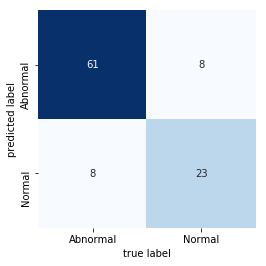



 Iteration1


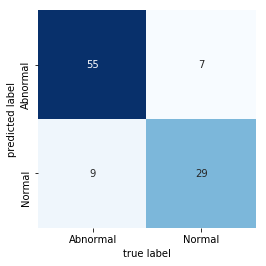



 Iteration2


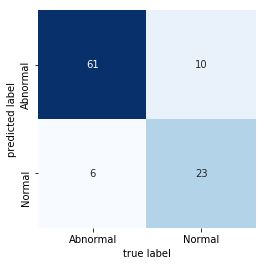



 Iteration3


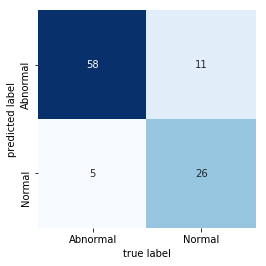



 Iteration4


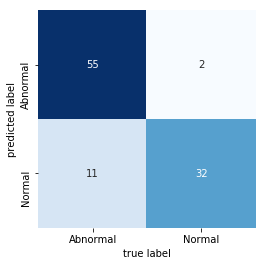

In [261]:
tn = []
fn = []
fp = []
tp = []
Accuracy = []
for i in range(5):
    print("\n\n Iteration" + str(i))
    d1 = shuffle(d1)
    X = d1.loc[:,'pelvic_incidence':'degree_spondylolisthesis']
    y = d1.loc[:,'class']
    X_train,X_test,y_train,y_test = X[:210] , X[210:], y[:210] , y[210:]
    svm = SVC(kernel='linear') 
    train_svm = svm.fit(X_train, y_train)
    pred = train_svm.predict(X_test)
    confusionMatrix = confusion_matrix(y_test, pred)
    sns.heatmap(confusionMatrix.T, square=True, annot=True, fmt='d', cbar=False,
                    xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    plt.show()
    tn.append(confusionMatrix[0,0])
    fp.append(confusionMatrix[0,1])
    fn.append(confusionMatrix[1,0])
    tp.append(confusionMatrix[1,1])
    

# Creating Confusion matrix using average values true positive etc.

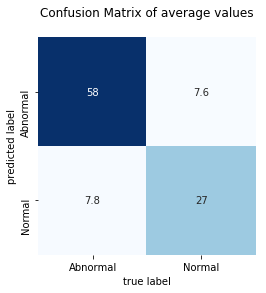

In [281]:
avg_tn = np.mean(tn)
avg_fp = np.mean(fp)
avg_fn = np.mean(fn)
avg_tp = np.mean(tp)

avgConfusionMatrix = np.array([[avg_tn, avg_fp], [avg_fn, avg_tp]])
sns.heatmap(avgConfusionMatrix.T, square=True, annot=True, cbar=False,
                    xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix of average values\n')
plt.show()


# Computing recall, precision and accuracy

In [306]:
precisionAbnormal, precisionNormal = avg_tn/(avg_tn+avg_fn), avg_tp/(avg_tp+avg_fp)
recallAbnormal, recallNormal = avg_tn/(avg_tn+avg_fp), avg_tp/(avg_tp+avg_fn)
accuracy = (avg_tn+avg_tp)/(avg_fn+avg_fp+avg_tn+avg_tp)
avgPrecision, avgRecall = (precisionNormal+precisionAbnormal)/2, (recallAbnormal+recallNormal)/2
print('Class \t\t' + 'Abnormal \t\t' + 'Normal \t\t\t' + 'Average')
print('Precision \t' + str(precisionAbnormal) + '\t\t' + str(precisionNormal) +'\t\t' + str(avgPrecision))
print('Recall \t\t' + str(recallAbnormal) + '\t\t' + str(recallNormal) +'\t\t' + str(avgRecall))
print('Accuracy of model  \t' + str(accuracy))

Class 		Abnormal 		Normal 			Average
Precision 	0.764267990074		0.865979381443		0.815123685759
Recall 		0.959501557632		0.469273743017		0.714387650325
Accuracy of model  	0.784


# Data Analysis Using RBF Kernel

In [296]:
d1 = shuffle(d1)
X = d1.loc[:,'pelvic_incidence':'degree_spondylolisthesis']
y = d1.loc[:,'class']
X_train,X_test,y_train,y_test = X[:210] , X[210:], y[:210] , y[210:]
svm = SVC(kernel='rbf', gamma=0.01, C = 1) 
train_svm = svm.fit(X_train, y_train)

In [308]:
supportVectors = train_svm.support_vectors_
countSupportVector = train_svm.n_support_
print('Number of support Vectors for class Abnormal: \t' + str(countSupportVector[0]))
print('Number of support Vectors for class Normal:   \t' + str(countSupportVector[1]))

Number of support Vectors for class Abnormal: 	139
Number of support Vectors for class Normal:   	59


# Support vectors for class - Abnormal

In [298]:
classAbnormalSupportVector = pd.DataFrame(supportVectors[:countSupportVector[0]], columns=('pelvic_incidence', 'pelvic_tilt numeric',
                             'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'))
classAbnormalSupportVector

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,78.425951,33.425951,76.277439,45.000000,138.554111,77.155172
1,42.021386,-6.554948,67.900000,48.576334,111.585782,27.338671
2,60.044177,14.309656,58.038865,45.734521,105.131664,30.409133
3,72.643850,18.929117,68.000000,53.714733,116.963416,25.384247
4,63.404481,14.115327,48.136806,49.289153,111.916007,31.784495
5,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551
6,48.060626,5.687032,57.057161,42.373594,95.443757,32.835877
7,81.112605,20.690444,60.687006,60.422161,94.018783,40.510982
8,53.854798,19.230643,32.779060,34.624155,121.670915,5.329843
9,76.314028,41.933683,93.284863,34.380345,132.267285,101.218783


# Support vectors for class - Normal

In [299]:
classNormalSupportVector = pd.DataFrame(supportVectors[countSupportVector[0]:], columns=('pelvic_incidence', 'pelvic_tilt numeric',
                             'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'))
classNormalSupportVector

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,67.289712,16.717514,51.000000,50.572198,137.591778,4.960344
1,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910
2,40.683229,9.148437,31.021593,31.534792,139.118472,-2.511619
3,39.656902,16.208839,36.674857,23.448063,131.922009,-4.968980
4,45.575482,18.759135,33.774143,26.816347,116.797007,3.131910
5,49.828135,16.736435,28.000000,33.091700,121.435558,1.913307
6,38.046551,8.301669,26.236830,29.744881,123.803413,3.885773
7,62.140805,13.960975,58.000000,48.179830,133.281834,4.955106
8,50.160078,-2.970024,42.000000,53.130102,131.802491,-8.290203
9,51.311771,8.875541,57.000000,42.436230,126.472258,-2.144044


In [300]:
pred = train_svm.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True, sample_weight=None)
acc

0.84999999999999998

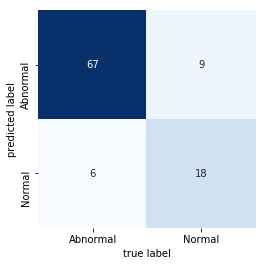

In [301]:
class_names = ['Abnormal', 'Normal']
confusionMatrix = confusion_matrix(y_test, pred)
sns.heatmap(confusionMatrix.T, square=True, annot=True, fmt='d', cbar=False,
                    xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');
result = precision_recall_fscore_support(y_test, pred, average=None, labels=['Abnormal', 'Normal'])

#  Training randomly selected data 5 times and plotting confusion matix



 Iteration0


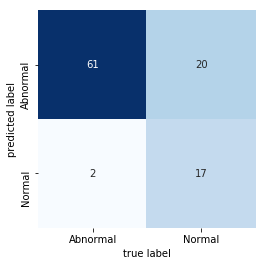



 Iteration1


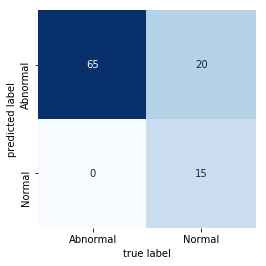



 Iteration2


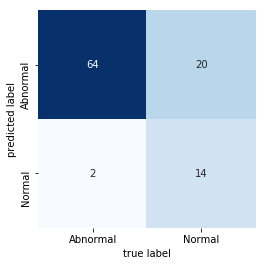



 Iteration3


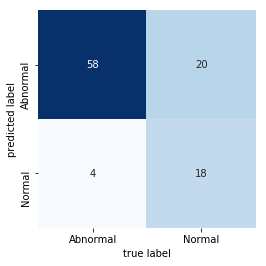



 Iteration4


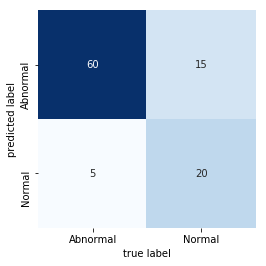

In [302]:
tn = []
fn = []
fp = []
tp = []
Accuracy = []
for i in range(5):
    print("\n\n Iteration" + str(i))
    d1 = shuffle(d1)
    X = d1.loc[:,'pelvic_incidence':'degree_spondylolisthesis']
    y = d1.loc[:,'class']
    X_train,X_test,y_train,y_test = X[:210] , X[210:], y[:210] , y[210:]
    svm = SVC(kernel='rbf', gamma=0.01, C = 1) 
    train_svm = svm.fit(X_train, y_train)
    pred = train_svm.predict(X_test)
    confusionMatrix = confusion_matrix(y_test, pred)
    sns.heatmap(confusionMatrix.T, square=True, annot=True, fmt='d', cbar=False,
                    xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    plt.show()
    tn.append(confusionMatrix[0,0])
    fp.append(confusionMatrix[0,1])
    fn.append(confusionMatrix[1,0])
    tp.append(confusionMatrix[1,1])
    

# Creating Confusion matrix using average values true positive etc.

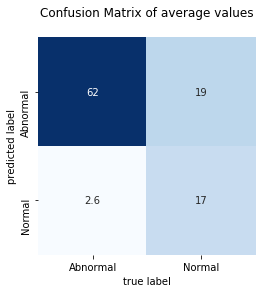

In [303]:
avg_tn = np.mean(tn)
avg_fp = np.mean(fp)
avg_fn = np.mean(fn)
avg_tp = np.mean(tp)

avgConfusionMatrix = np.array([[avg_tn, avg_fp], [avg_fn, avg_tp]])
sns.heatmap(avgConfusionMatrix.T, square=True, annot=True, cbar=False,
                    xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix of average values\n')
plt.show()

# Computing recall, precision and accuracy

In [307]:
precisionAbnormal, precisionNormal = avg_tn/(avg_tn+avg_fn), avg_tp/(avg_tp+avg_fp)
recallAbnormal, recallNormal = avg_tn/(avg_tn+avg_fp), avg_tp/(avg_tp+avg_fn)
accuracy = (avg_tn+avg_tp)/(avg_fn+avg_fp+avg_tn+avg_tp)
avgPrecision, avgRecall = (precisionNormal+precisionAbnormal)/2, (recallAbnormal+recallNormal)/2
print('Class \t\t' + 'Abnormal \t\t' + 'Normal \t\t\t' + 'Average')
print('Precision \t' + str(precisionAbnormal) + '\t\t' + str(precisionNormal) +'\t\t' + str(avgPrecision))
print('Recall \t\t' + str(recallAbnormal) + '\t\t' + str(recallNormal) +'\t\t' + str(avgRecall))
print('Accuracy of model  \t' + str(accuracy))

Class 		Abnormal 		Normal 			Average
Precision 	0.764267990074		0.865979381443		0.815123685759
Recall 		0.959501557632		0.469273743017		0.714387650325
Accuracy of model  	0.784
